# Minimal SIR Model Example

This is a basic example showing a minimal model built using summer. We will create a SIR compartmental model for some fictional disease. There will be a starting population of 1000 people, with 10 infectious people.

First, let's import the summer library and create a new model object where:

- the model has three compartments: S, I, R
    - S: susceptible, have not been infected
    - I: infected (and infectious)
    - R: recovered
- the model will be evaluated from years 1990 to 2025
- the model results will be returned in 0.1 year timesteps

In [41]:
from summer import CompartmentalModel

model = CompartmentalModel(
    times=[1990, 2025],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

## Adding a population 

Initially the model compartments are all empty.
Let's add 900 people to the susceptible compartment, plus 100 in the infectious compartment.

In [42]:
model.set_initial_population(distribution={"S": 990, "I": 10})

## Adding intercompartmental flows 

Now, let's add some flows between the compartments. These flows will define the dynamics of our ficticious disease:

- an infection flow from S to I (using frequency dependent transmission)
- a recovery flow from I to R
- an infection death flow, that impacts people in the I compartment

In [43]:
# Susceptible people get infected.
model.add_infection_frequency_flow(name="infection", contact_rate=2, source="S", dest="I")

# Infectious people take 3 years, on average, to recover.
model.add_sojourn_flow(name="recovery", sojourn_time=3, source="I", dest="R")

# Add an infection-specific death flow to the I compartment.
model.add_death_flow(name="infection_death", death_rate=0.05, source="I")

## Running the model

Now we can calculate the outputs for the model over the requested time period. The model calculates the compartment sizes by solving a differential equation which is defined by the flows we just added.

In [44]:
model.run()

## Print the model outputs

The model's results are available in a NumPy array named `model.outputs`. This array is available after the model has been run. Let's have a look at what's inside:

In [45]:
# Force NumPy to format the output array nicely. 
import numpy as np
np.set_printoptions(formatter={'all': lambda f: str(int(f))})

# Print the output array.
ts, cs = model.outputs.shape
print("Output shape:", model.outputs.shape, "with", ts, "timesteps and", cs, "compartments.")
print("Output array:\n", model.outputs)

Output shape: (360, 3) with 360 timesteps and 3 compartments.
Output array:
 [[990 10 0]
 [987 11 0]
 [985 13 0]
 ...
 [3 0 866]
 [3 0 866]
 [3 0 866]]


## Plot the outputs

You can get a better idea of what is going on inside the model by visualizing how the compartment sizes change over time.

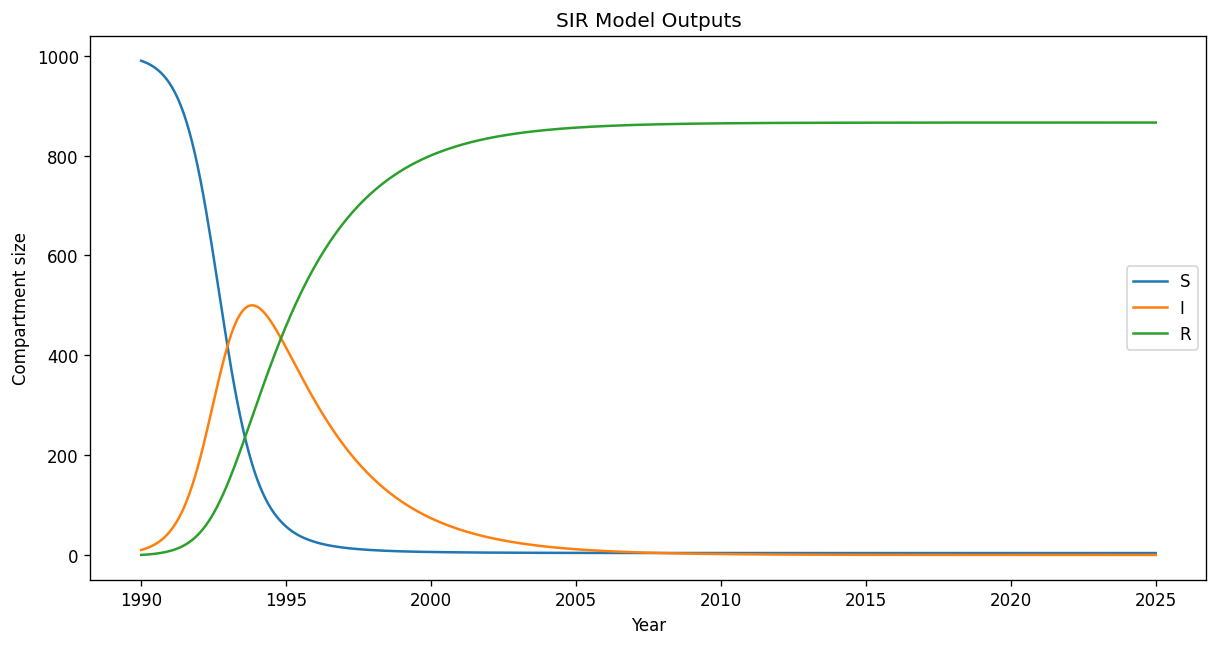

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)

# Add each compartment to the plot.
for i in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Year")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
plt.show()

That's it for now, now you know how to:

- create a model
- add a population
- add flows
- run the model
- access and visualize the outputs

A detailed API reference of the CompartmentalModel class can be found [here](http://summerepi.com/api/model.html)